<a href="https://colab.research.google.com/github/arthurnovello/ECM514-Ciencia_dos_Dados/blob/master/brcities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2ª Aula - BRAZIL CITIES DATASET

In [0]:
import pandas as pd
import numpy as np

br_cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ecm514_datasets/BRAZIL_CITIES.csv', sep = ';', decimal = ',')
br_cities = br_cities.rename(columns = {"IBGE_60+" : "IBGE_60"})
br_cities

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,IBGE_5-9,IBGE_10-14,IBGE_15-59,IBGE_60,IBGE_PLANTED_AREA,IBGE_CROP_PRODUCTION_$,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,LONG,LAT,ALT,PAY_TV,FIXED_PHONES,AREA,REGIAO_TUR,CATEGORIA_TUR,ESTIMATED_POP,RURAL_URBAN,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,...,GDP_CAPITA,GVA_MAIN,MUN_EXPENDIT,COMP_TOT,COMP_A,COMP_B,COMP_C,COMP_D,COMP_E,COMP_F,COMP_G,COMP_H,COMP_I,COMP_J,COMP_K,COMP_L,COMP_M,COMP_N,COMP_O,COMP_P,COMP_Q,COMP_R,COMP_S,COMP_T,COMP_U,HOTELS,BEDS,Pr_Agencies,Pu_Agencies,Pr_Bank,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,São Paulo,SP,1,11253503.0,11133776.0,119727.0,3576148.0,3548433.0,27715.0,10463636.0,129464.0,514794.0,684443.0,783702.0,7058221.0,1293012.0,94.0,1134.0,28.0,0.805,0.843,0.855,0.725,-46.570383,-23.567386,783.62,2047668.0,5543127.0,1521.11,Capital,A,12176866.0,Urbano,43867.07,63306754.97,4.646570e+08,41902892.72,5.699105e+08,1.171254e+08,6.870359e+08,...,57071.43,Demais serviços,4.577250e+10,530446.0,739.0,79.0,31566.0,332.0,657.0,25222.0,150633.0,19515.0,29290.0,38720.0,23738.0,14003.0,49181.0,76757.0,153.0,16030.0,22248.0,6687.0,24832.0,0.0,64.0,57.0,10022.0,1693.0,626.0,83.0,8.0,1.947077e+13,2.893261e+12,5740995.0,1134570.0,3236.0,1.0,130.0,7.0,225.0
1,Osasco,SP,0,666740.0,664447.0,2293.0,202009.0,202009.0,NaN,616068.0,8089.0,32305.0,42733.0,49379.0,420590.0,62972.0,0.0,0.0,174.0,0.780,0.776,0.840,0.718,-46.788810,-23.533612,742.97,98664.0,231302.0,64954.00,Negócios E Cultura,B,696850.0,Urbano,947.16,3036.39,5.311143e+07,2627577.24,5.877635e+07,1.562634e+07,7.440269e+07,...,106841.78,Demais serviços,1.758451e+09,15315.0,11.0,2.0,863.0,1.0,29.0,703.0,6002.0,1026.0,1230.0,706.0,271.0,238.0,761.0,1535.0,6.0,527.0,492.0,142.0,770.0,0.0,0.0,2.0,272.0,67.0,26.0,10.0,2.0,6.732330e+12,1.321699e+10,283641.0,73477.0,174.0,NaN,7.0,1.0,10.0
2,Rio De Janeiro,RJ,1,6320446.0,6264915.0,55531.0,2147235.0,2147235.0,NaN,5426838.0,58958.0,235380.0,321084.0,382267.0,3559037.0,870112.0,2098.0,41072.0,46.0,0.799,0.840,0.845,0.719,-43.227875,-22.876652,11.80,1271672.0,2417123.0,1200255.00,Metropolitana,A,6688927.0,Urbano,81.37,36334430.50,1.773611e+08,47548.35,2.613252e+08,6.810612e+04,3.294314e+08,...,50690.82,Demais serviços,2.364284e+10,190038.0,172.0,274.0,6824.0,235.0,272.0,7797.0,47545.0,4825.0,12289.0,9070.0,6327.0,4281.0,19248.0,34812.0,120.0,6744.0,9905.0,5039.0,14224.0,0.0,35.0,94.0,13247.0,815.0,304.0,34.0,5.0,2.283445e+12,9.738864e+11,2039930.0,363486.0,289.0,1.0,68.0,1.0,120.0
3,Brasília,DF,1,2570160.0,2564370.0,5790.0,774820.0,751558.0,23261.0,2450634.0,35833.0,143641.0,190078.0,207283.0,1683918.0,189881.0,162894.0,822413.0,9.0,0.820,0.863,0.873,0.742,-47.887905,-15.794087,1115.25,460682.0,920410.0,5760783.00,Brasília - Patrimônio Cultural Da Humanidade,A,2974703.0,Urbano,820754.66,9659849.10,1.038195e+08,92051.45,2.063515e+08,2.914559e+07,2.354971e+08,...,79099.77,"Administração, defesa, educação e saúde públic...",NaN,86200.0,242.0,42.0,3269.0,22.0,130.0,4685.0,29018.0,2157.0,6788.0,3254.0,1527.0,1670.0,6717.0,10346.0,204.0,3043.0,5363.0,1197.0,6403.0,0.0,123.0,23.0,4960.0,150.0,274.0,14.0,4.0,2.920933e+11,8.016164e+12,1288107.0,211392.0,594.0,1.0,28.0,1.0,60.0
4,Porto Alegre,RS,1,1409351.0,1403450.0,5901.0,508503.0,508503.0,NaN,1339712.0,15235.0,58369.0,79310.0,93989.0,889503.0,203306.0,766.0,7967.0,32.0,0.805,0.867,0.857,0.702,-51.228660,-30.030037,42.24,352371.0,663846.0,495.39,Porto Alegre,A,1479101.0,Urbano,28354.58,6768083.47,4.893041e+07,6712383.63,6.243923e+07,1.098603e+07,7.342526e+04,...,49577.53,Demais serviços,5.358322e+09,80082.0,196.0,31.0,3482.0,57.0,95.0,4039.0,21550.0,2523.0,4205.0,3555.0,2461.0,1924.0,8139.0,16271.0,72.0,2217.0,3489.0,1339.0,4429.0,0.0,8.0,17.0,3548.0,180.0,168.0,20.0,3.0,2.709619e+11,4.026997e+11,608777.0,106829.0,1383.0,1.0,19.0,12.0,53.0
...,...,

### City Count

In [0]:
city_count = br_cities.groupby('STATE').size().reset_index(name='QTD_CIDADES')
city_count

,STATE,QTD_CIDADES
0,AC,22
1,AL,102
2,AM,62
3,AP,16
4,BA,418
5,CE,184
6,DF,1
7,ES,78
8,GO,246
9,MA,217


<Figure size 1540x980 with 0 Axes>

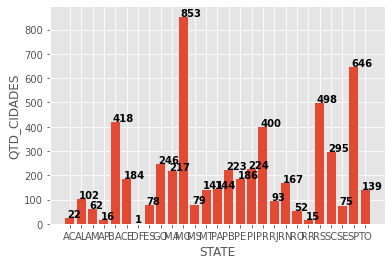

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
fig, ax = plt.subplots()
plt.ylabel(city_count.columns.values[1])
plt.xlabel(city_count.columns.values[0])
plt.bar(city_count['STATE'], city_count['QTD_CIDADES'])
plt.xticks(np.arange(27), city_count['STATE'])
for i, v in enumerate(city_count['QTD_CIDADES']):
  plt.text(i-.25, v + 4, str(v), color='black', fontweight='bold')
plt.show()

### GDP x TAXA

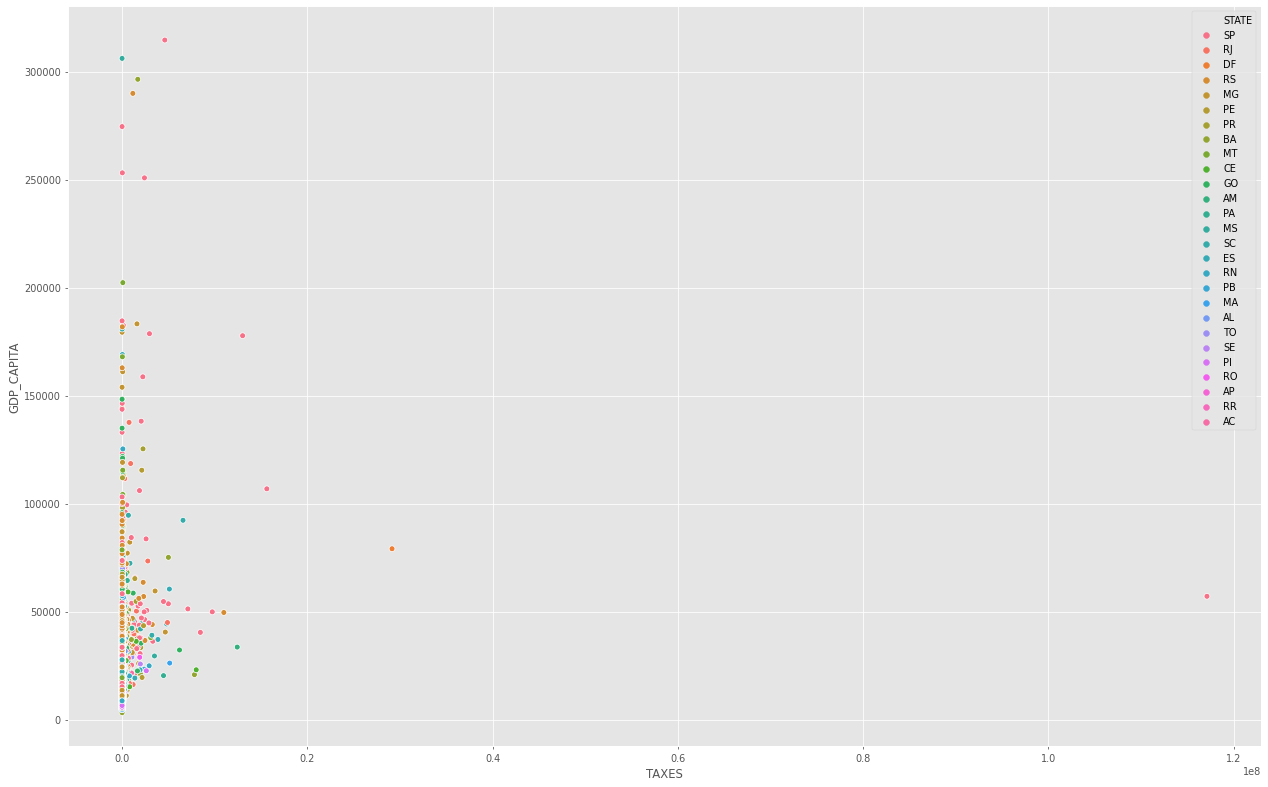

In [0]:
import seaborn as sns
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['TAXES'], dtype=int)
y = pd.Series(br_cities['GDP_CAPITA'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'TAXES' : x, 'GDP_CAPITA' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['TAXES'], gdp_x_tax['GDP_CAPITA'], hue = gdp_x_tax['STATE'])
plt.show()

In [0]:
sns.set(style="whitegrid")

x = pd.Series(br_cities['CATEGORIA_TUR'])
y = pd.Series(br_cities['GDP_CAPITA'], dtype=float)

data = { 'CATEGORIA_TUR' : x, 'GDP_CAPITA' : y}

gdp_x_catTur = pd.DataFrame(data).dropna()
pd.to_numeric(gdp_x_catTur['GDP_CAPITA'])
gdp_x_catTur.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 5572
Data columns (total 2 columns):
CATEGORIA_TUR    3287 non-null object
GDP_CAPITA       3287 non-null float64
dtypes: float64(1), object(1)
memory usage: 77.0+ KB


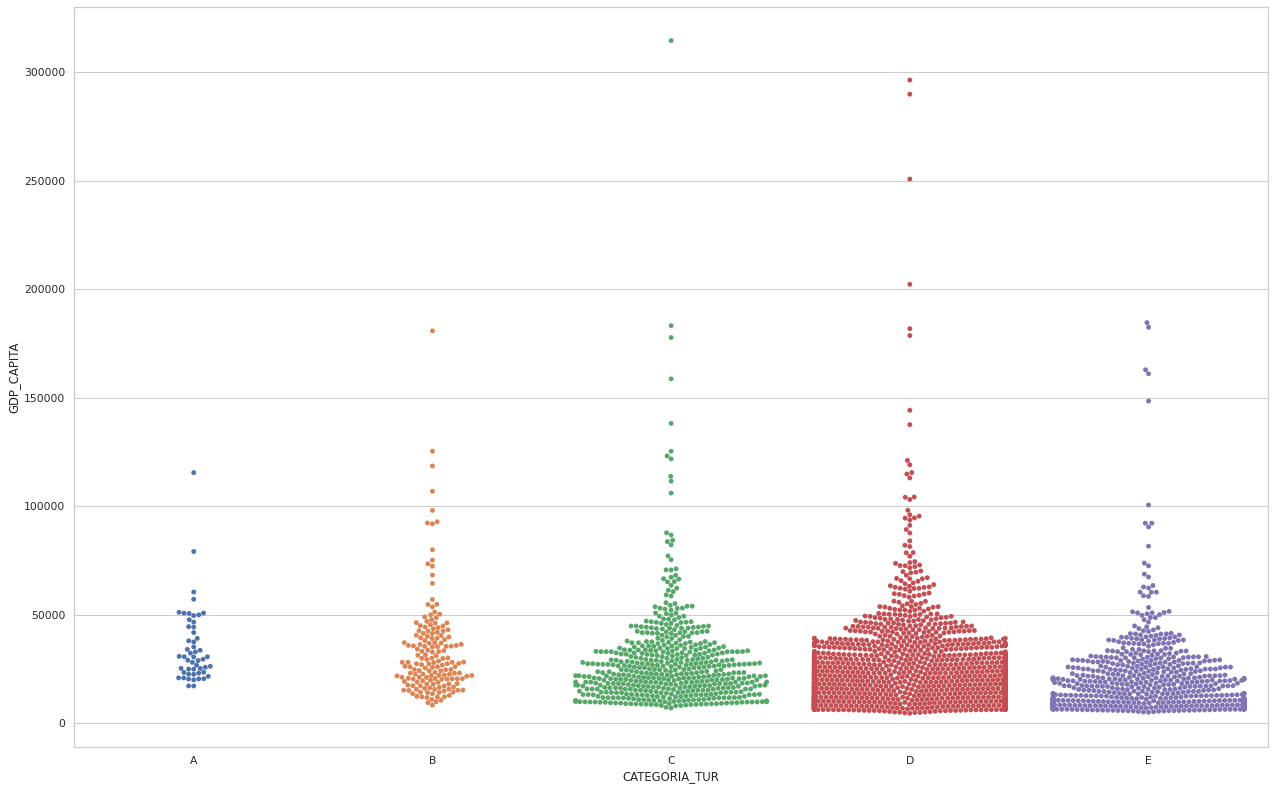

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")
ax = sns.swarmplot(x = 'CATEGORIA_TUR', y = 'GDP_CAPITA', data = gdp_x_catTur)
plt.show()

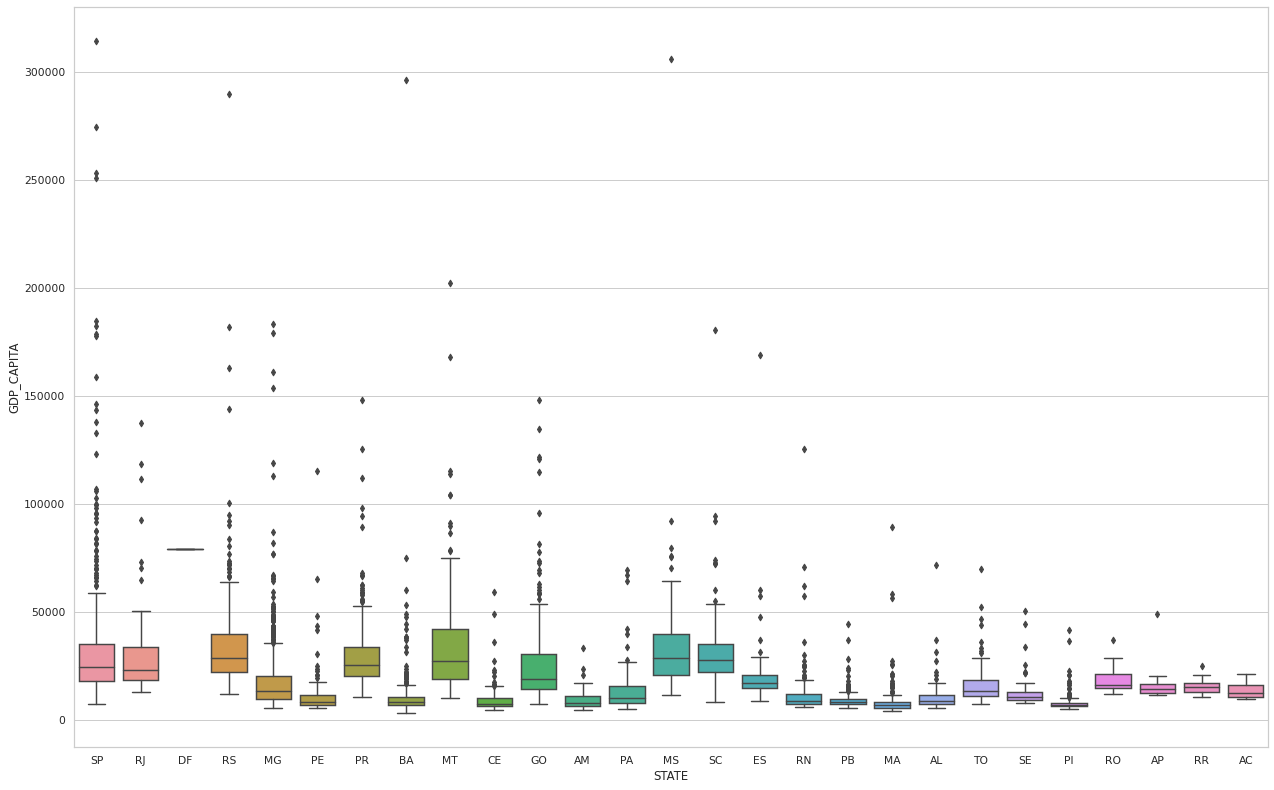

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")

ax = sns.boxplot(x=br_cities['STATE'], y=br_cities['GDP_CAPITA'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:861: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


<Figure size 1540x980 with 0 Axes>

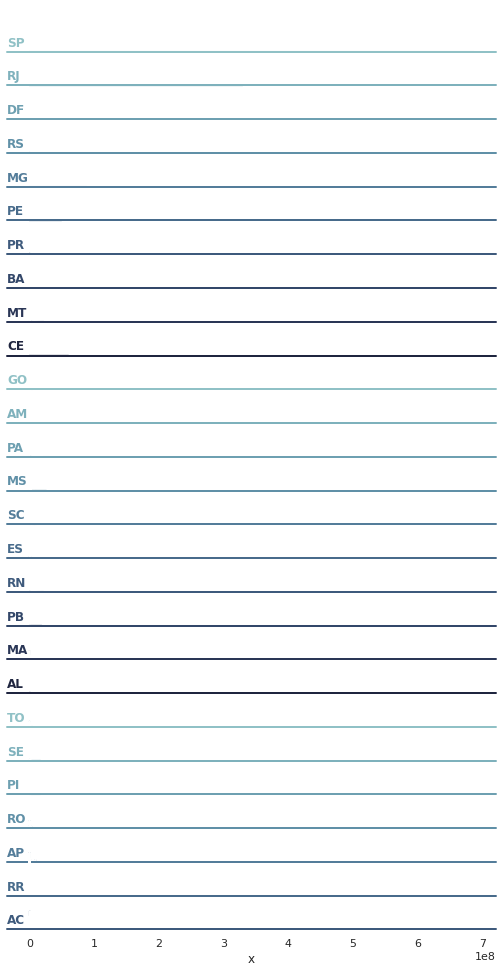

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

x = br_cities['GDP']
g = br_cities['STATE'].tolist()
df = pd.DataFrame(dict(x=x, g=g)).dropna()

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)


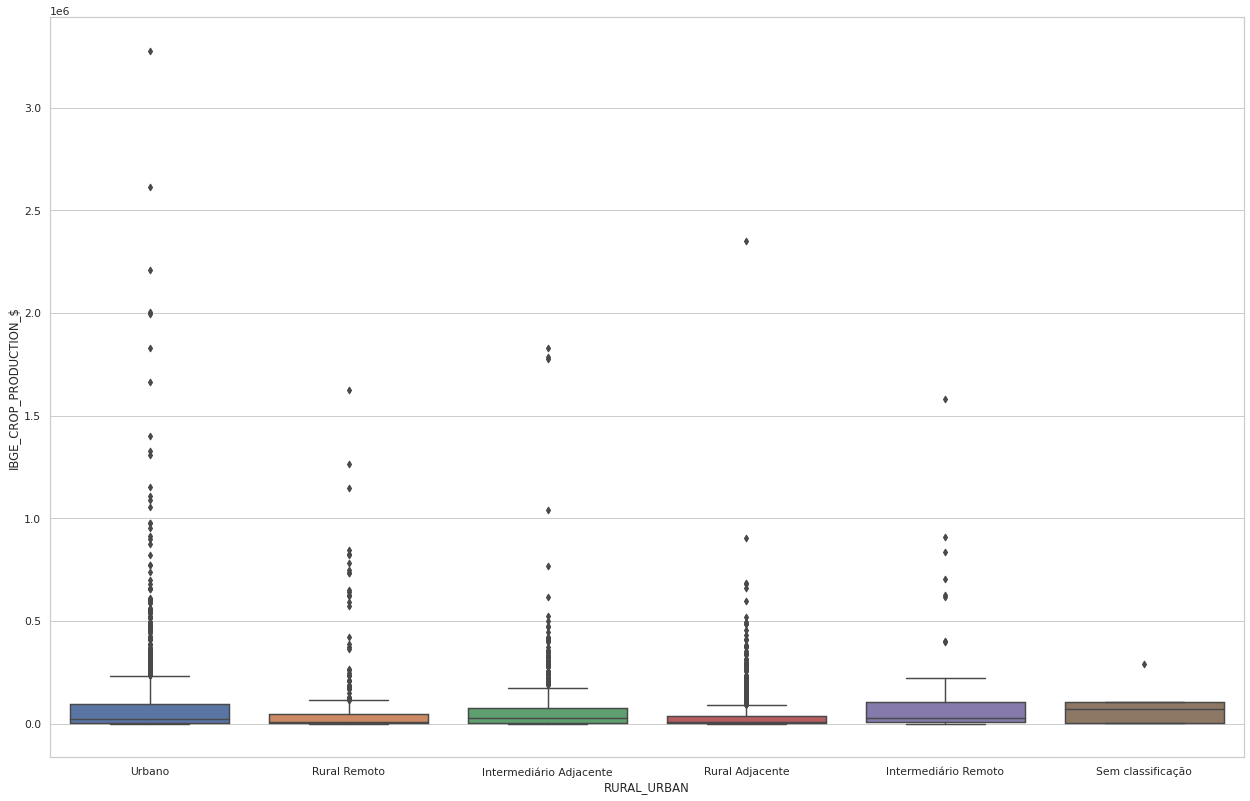

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")

ax = sns.boxplot(x=br_cities['RURAL_URBAN'], y=br_cities['IBGE_CROP_PRODUCTION_$'])
plt.show()

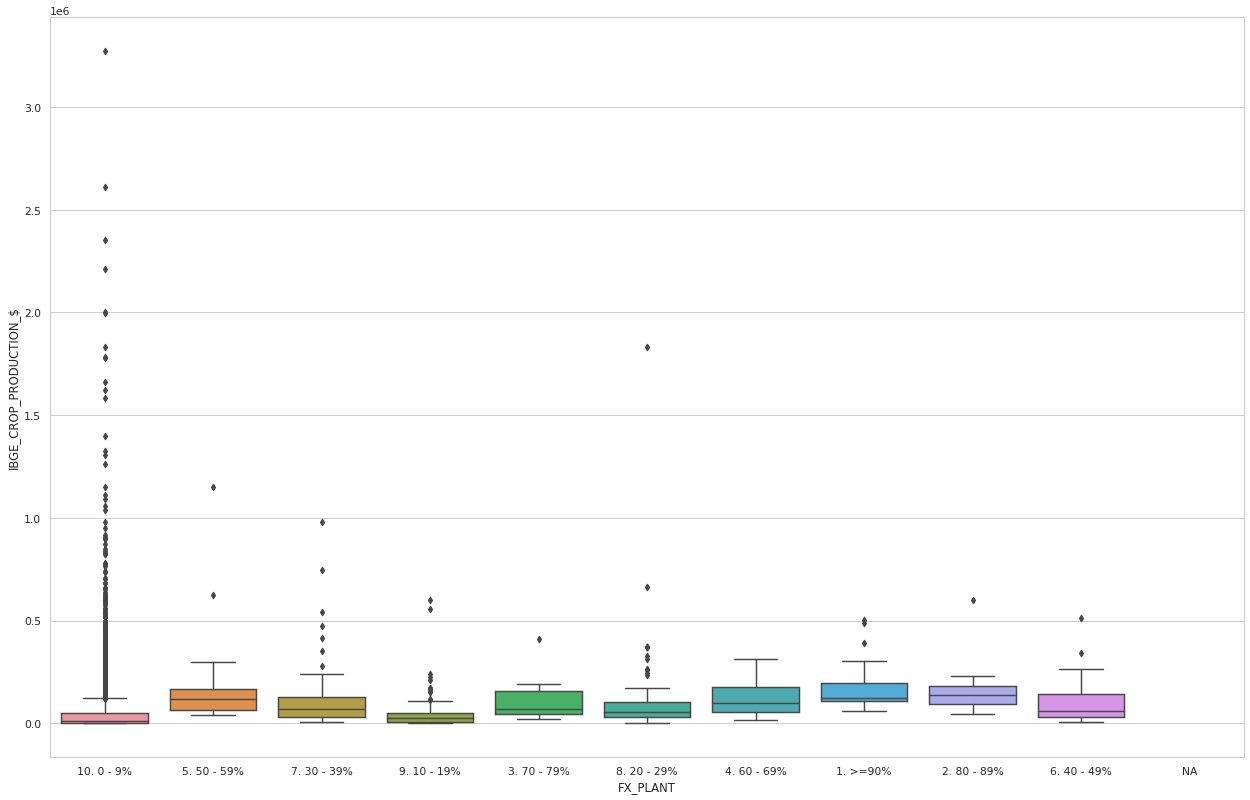

In [0]:
br_cities['%_PLANT'] = br_cities.apply(lambda row: ((row.IBGE_PLANTED_AREA*10000)/(row.AREA*1000000))*100, axis=1)
fx_plantada = [] 
for value in br_cities['%_PLANT']: 
    if value >= 90: 
        fx_plantada.append("1. >=90%") 
    elif value < 90 and value >= 80: 
        fx_plantada.append("2. 80 - 89%") 
    elif value < 80 and value >= 70: 
        fx_plantada.append("3. 70 - 79%")
    elif value < 70 and value >= 60: 
        fx_plantada.append("4. 60 - 69%")
    elif value < 60 and value >= 50: 
        fx_plantada.append("5. 50 - 59%")
    elif value < 50 and value >= 40: 
        fx_plantada.append("6. 40 - 49%")
    elif value < 40 and value >= 30: 
        fx_plantada.append("7. 30 - 39%")
    elif value < 30 and value >= 20: 
        fx_plantada.append("8. 20 - 29%")
    elif value < 20 and value >= 10: 
        fx_plantada.append("9. 10 - 19%")
    elif value < 10 and value >= 0:
        fx_plantada.append("10. 0 - 9%")
    else: 
        fx_plantada.append("NA") 
       
br_cities['FX_PLANT'] = fx_plantada    

fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")

ax = sns.boxplot(x=br_cities['FX_PLANT'], y=br_cities['IBGE_CROP_PRODUCTION_$'])
plt.show()

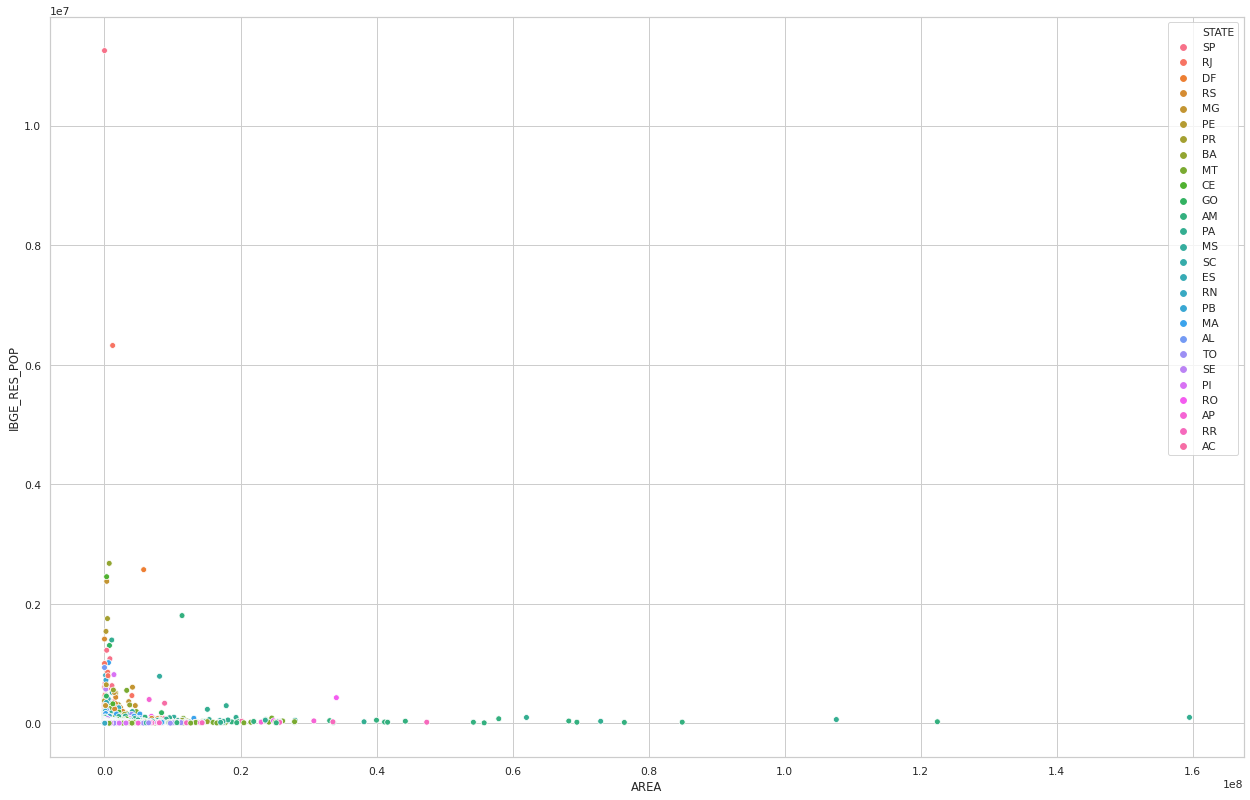

In [0]:
br_cities['POP_KM2'] = br_cities.apply(lambda row: ((row.IBGE_RES_POP)/(row.AREA)), axis=1)

fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['AREA'], dtype=int)
y = pd.Series(br_cities['IBGE_RES_POP'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'AREA' : x, 'IBGE_RES_POP' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['AREA'], gdp_x_tax['IBGE_RES_POP'], hue = gdp_x_tax['STATE'])
plt.show()

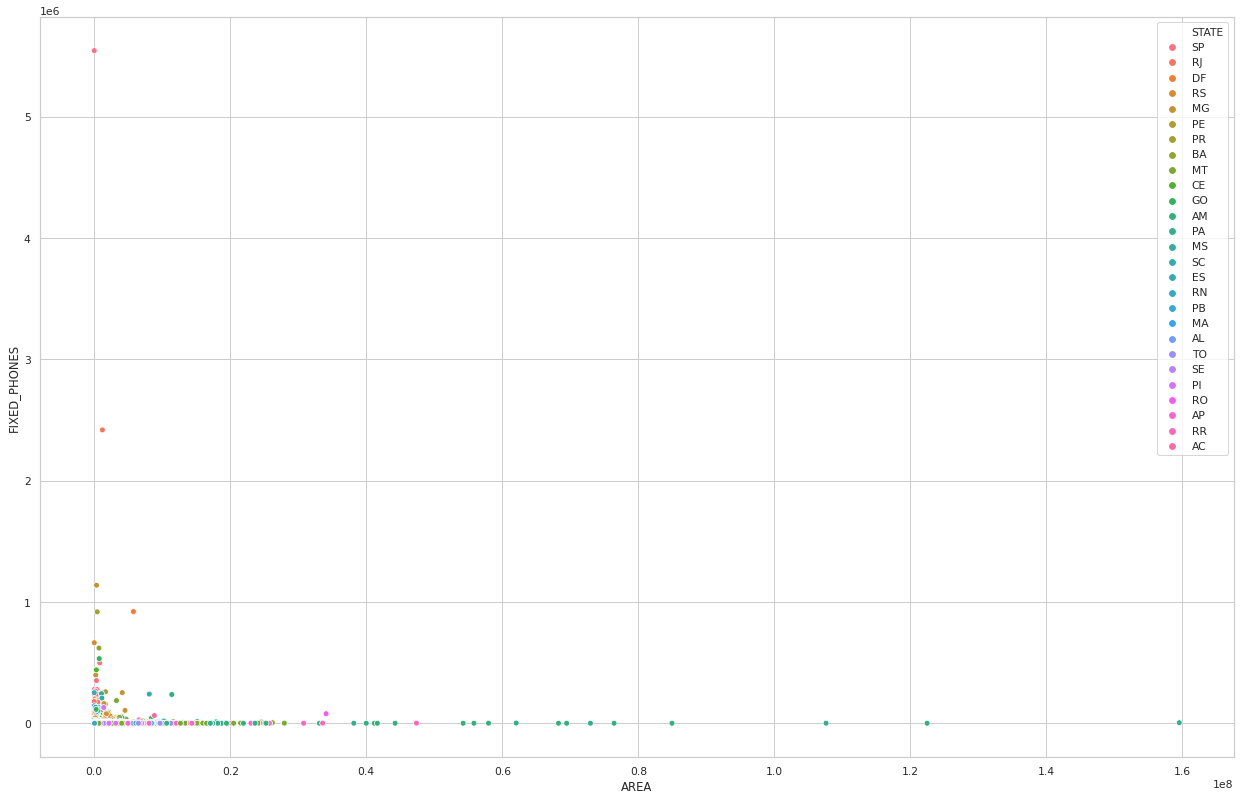

In [0]:
br_cities['TEL_KM2'] = br_cities.apply(lambda row: ((row.FIXED_PHONES)/(row.AREA)), axis=1)

fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['AREA'], dtype=int)
y = pd.Series(br_cities['FIXED_PHONES'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'AREA' : x, 'FIXED_PHONES' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['AREA'], gdp_x_tax['FIXED_PHONES'], hue = gdp_x_tax['STATE'])
plt.show()

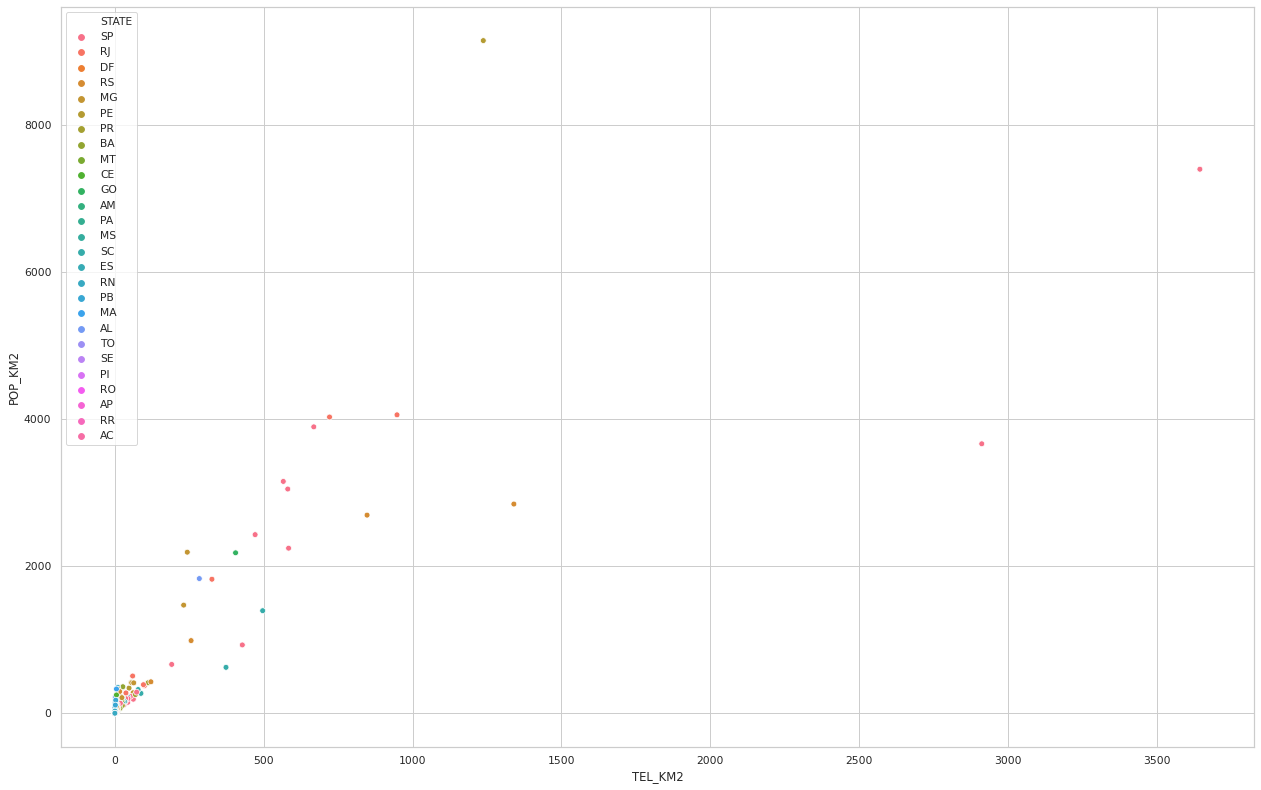

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['TEL_KM2'], dtype=int)
y = pd.Series(br_cities['POP_KM2'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'TEL_KM2' : x, 'POP_KM2' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['TEL_KM2'], gdp_x_tax['POP_KM2'], hue = gdp_x_tax['STATE'])
plt.show()

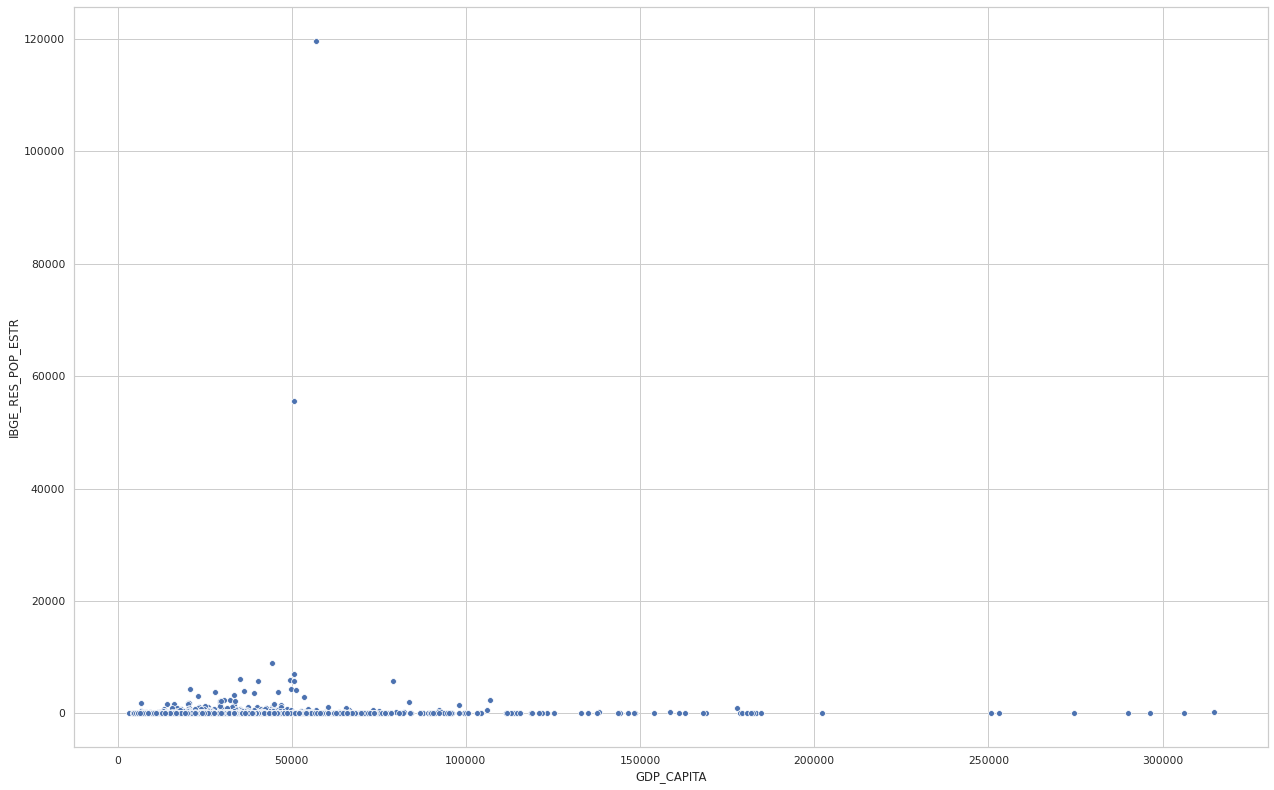

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['GDP_CAPITA'], dtype=int)
y = pd.Series(br_cities['IBGE_RES_POP_ESTR'], dtype=int)

data = { 'GDP_CAPITA' : x, 'IBGE_RES_POP_ESTR' : y}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['GDP_CAPITA'], gdp_x_tax['IBGE_RES_POP_ESTR'])
plt.show()

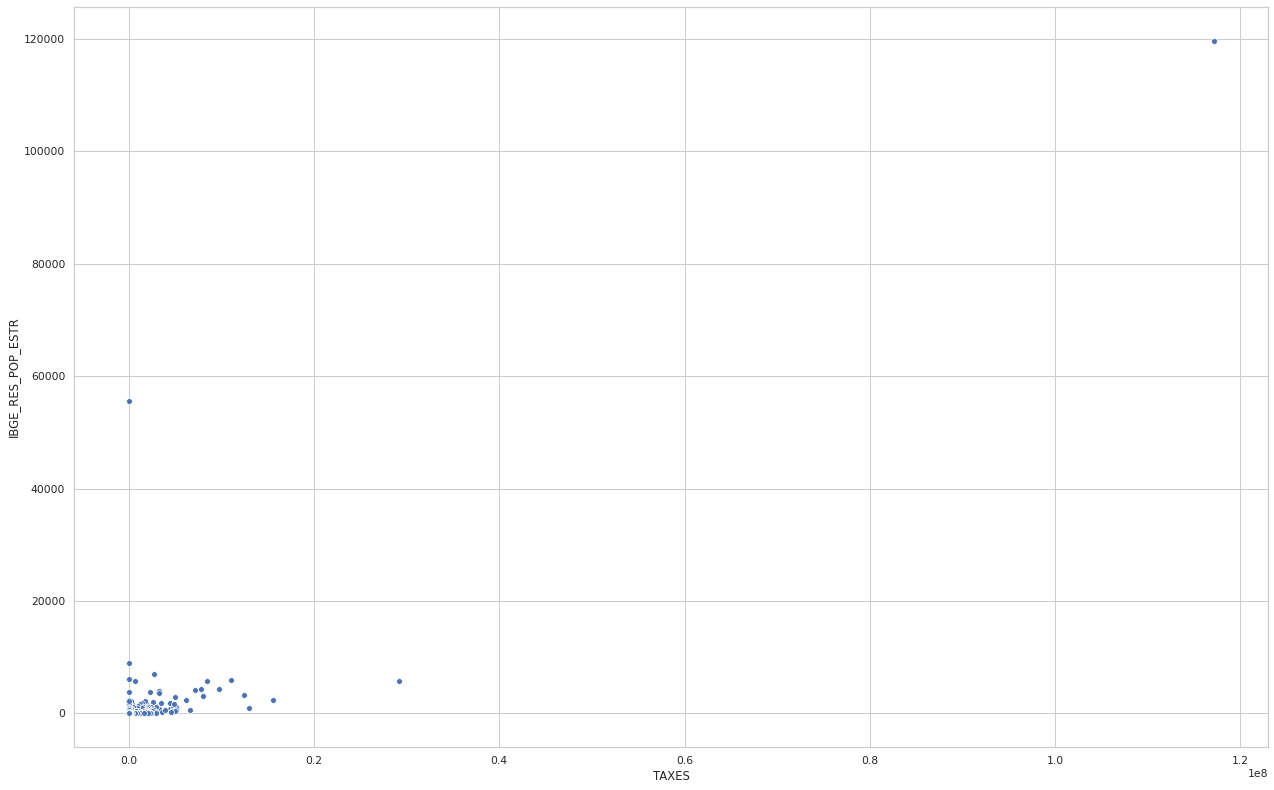

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['TAXES'], dtype=int)
y = pd.Series(br_cities['IBGE_RES_POP_ESTR'], dtype=int)

data = { 'TAXES' : x, 'IBGE_RES_POP_ESTR' : y}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['TAXES'], gdp_x_tax['IBGE_RES_POP_ESTR'])
plt.show()

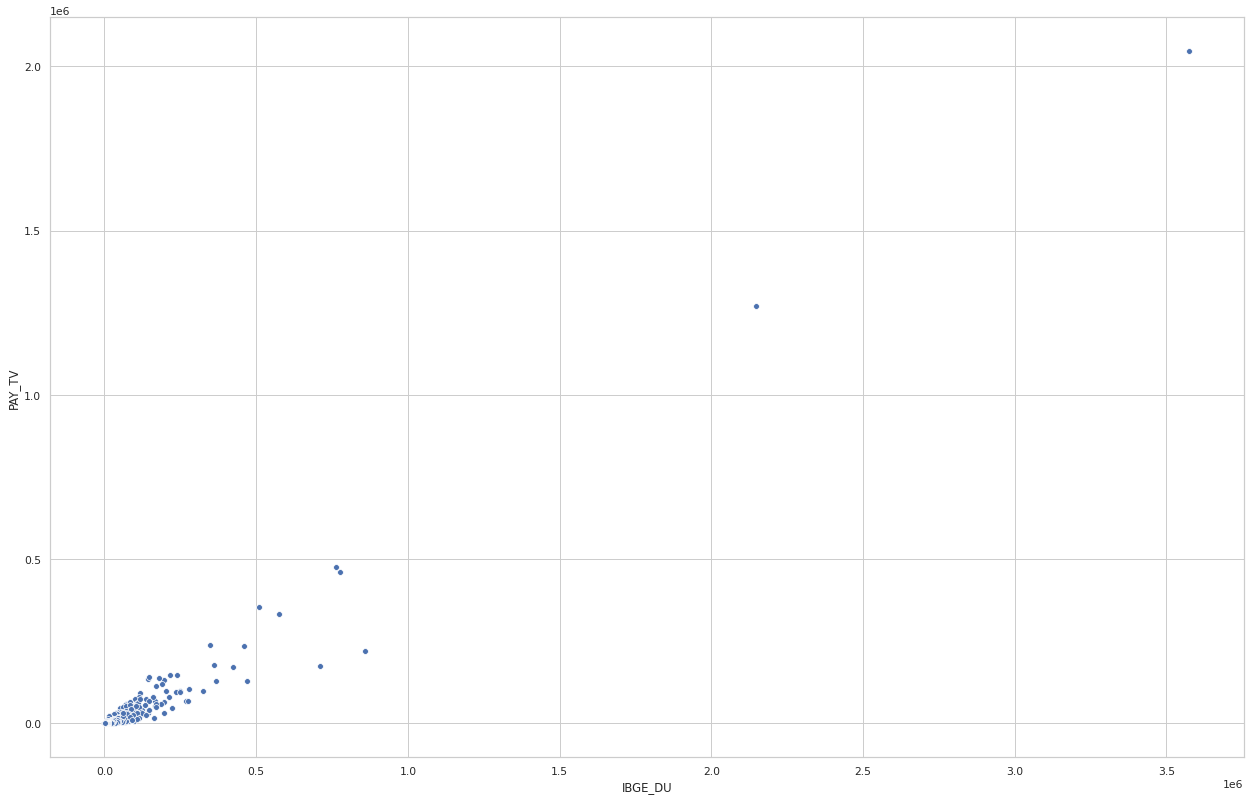

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['IBGE_DU'], dtype=int)
y = pd.Series(br_cities['PAY_TV'], dtype=int)

data = { 'IBGE_DU' : x, 'PAY_TV' : y}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['IBGE_DU'], gdp_x_tax['PAY_TV'])
plt.show()

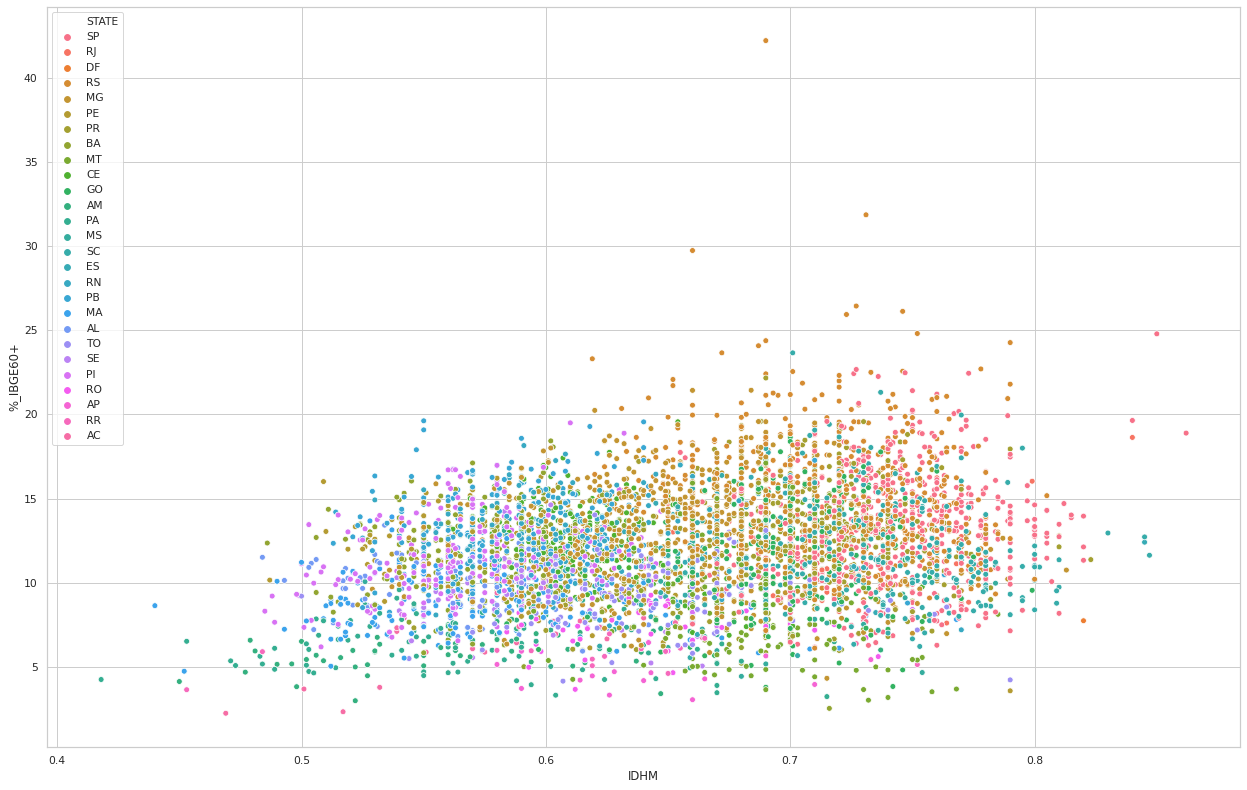

In [0]:
br_cities['%_IBGE60+'] = br_cities.apply(lambda row: ((row.IBGE_60)/(row.IBGE_POP))*100, axis=1)

fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['IDHM'], dtype=int)
y = pd.Series(br_cities['%_IBGE60+'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'IDHM' : x, '%_IBGE60+' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['IDHM'], gdp_x_tax['%_IBGE60+'], hue = gdp_x_tax['STATE'])
plt.show()

In [0]:
#Construção

const_cities = br_cities[br_cities.GVA_MAIN == 'Construção'].filter(['CITY', 'STATE', 'GVA_MAIN'])
const_cities


,CITY,STATE,GVA_MAIN
865,Icém,SP,Construção
1768,Vila Nova Dos Martírios,MA,Construção
2111,Porto Amazonas,PR,Construção
2564,Governador Mangabeira,BA,Construção
3038,Barra Funda,RS,Construção
3606,Canas,SP,Construção
3712,Santo Antônio De Goiás,GO,Construção


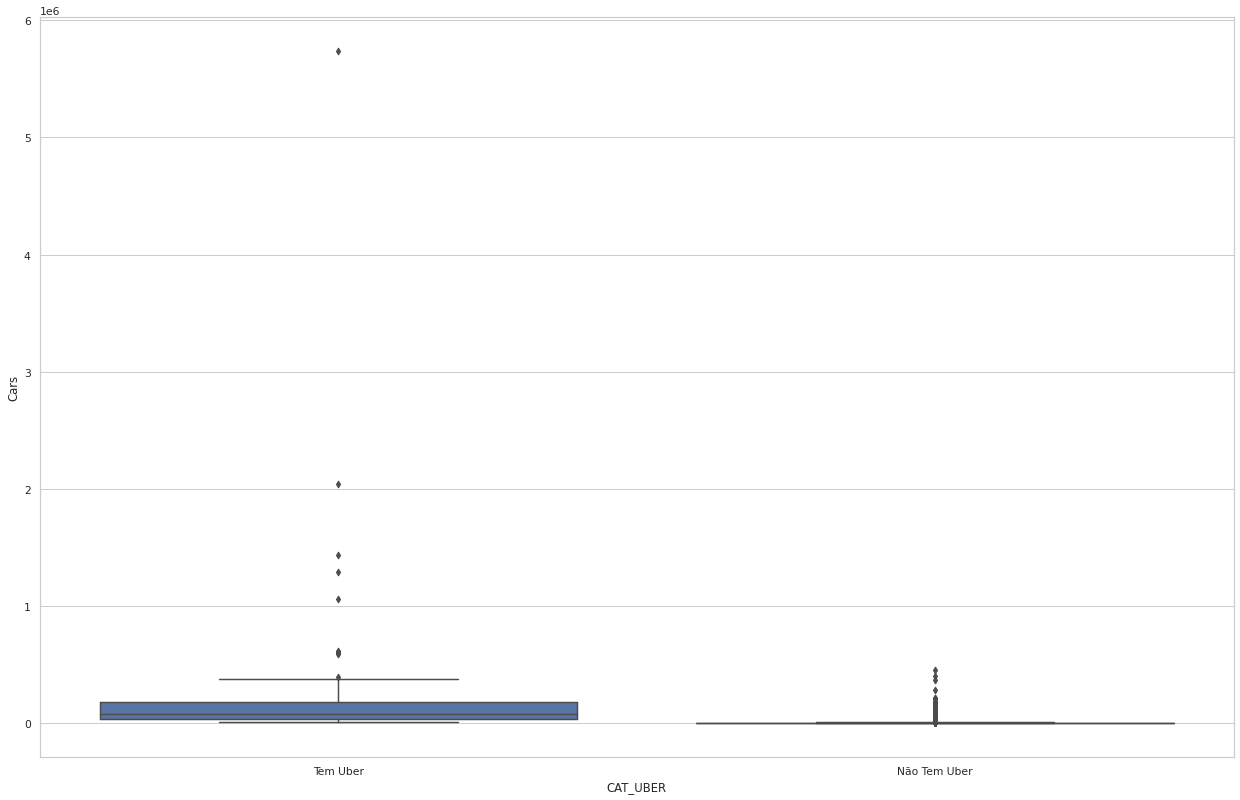

In [0]:
br_cities['CAT_UBER'] = br_cities.UBER.map({1 : "Tem Uber", np.nan : "Não Tem Uber"})
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')
sns.set(style="whitegrid")

ax = sns.boxplot(x=br_cities['CAT_UBER'], y=br_cities['Cars'])
plt.show()

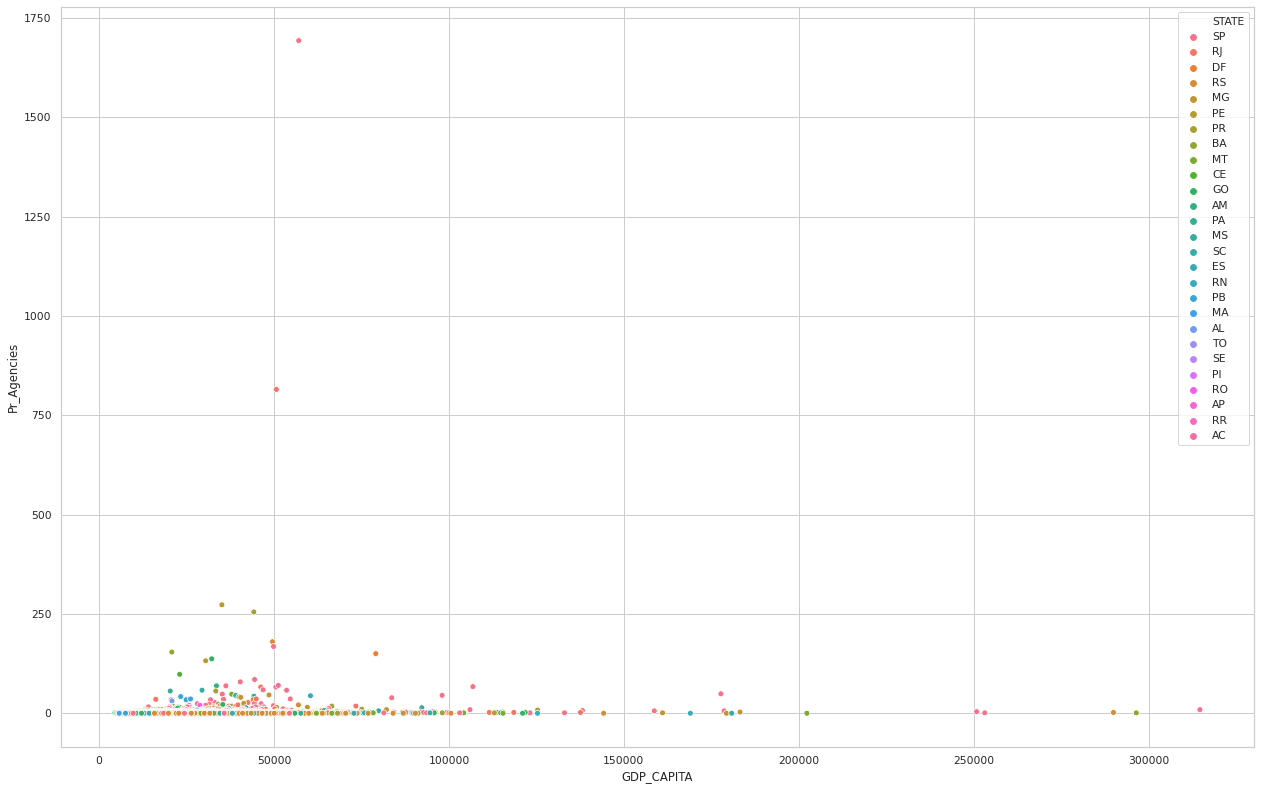

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['GDP_CAPITA'], dtype=int)
y = pd.Series(br_cities['Pr_Agencies'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'GDP_CAPITA' : x, 'Pr_Agencies' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['GDP_CAPITA'], gdp_x_tax['Pr_Agencies'], hue = gdp_x_tax['STATE'])
plt.show()

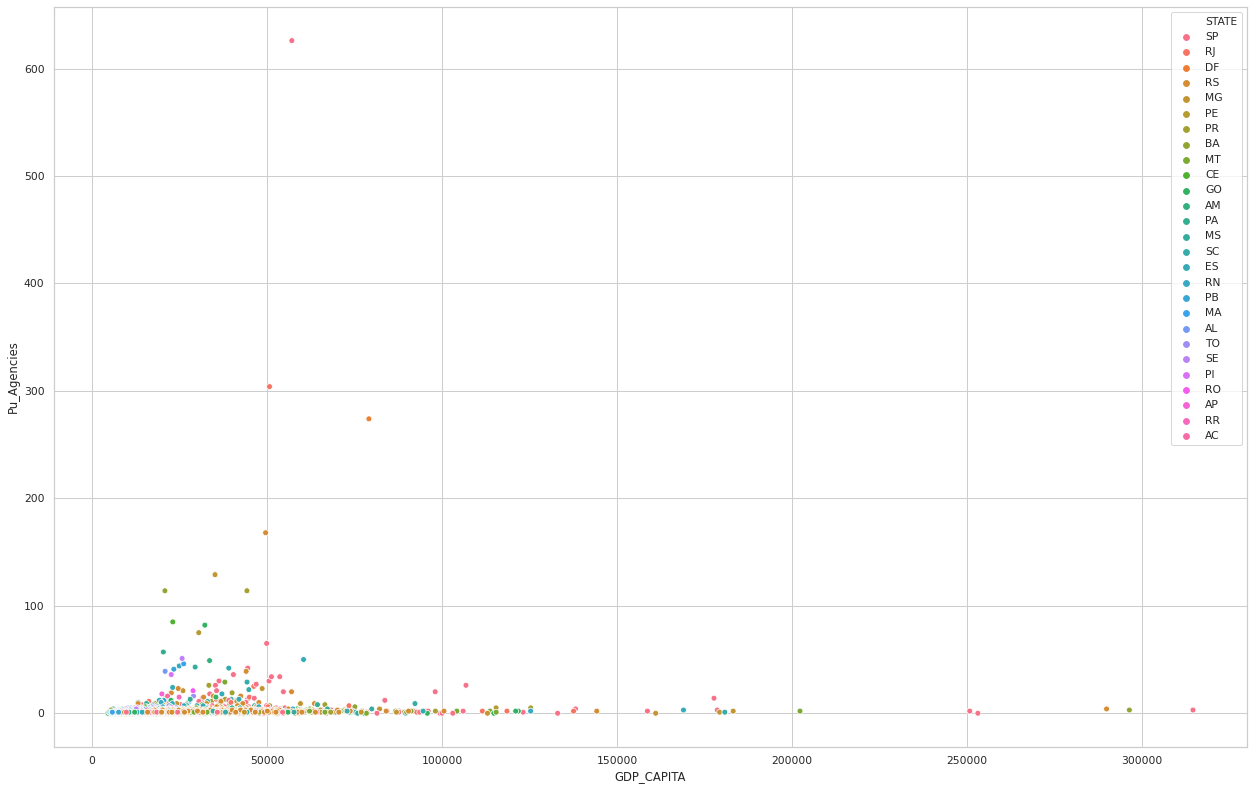

In [0]:
fig=plt.figure(figsize=(22, 14), dpi= 70, facecolor='w', edgecolor='k')

x = pd.Series(br_cities['GDP_CAPITA'], dtype=int)
y = pd.Series(br_cities['Pu_Agencies'], dtype=int)
c = pd.Series(br_cities['STATE'])

data = { 'GDP_CAPITA' : x, 'Pu_Agencies' : y, 'STATE' : c}
gdp_x_tax = pd.DataFrame(data).dropna()
gdp_x_tax

sns.scatterplot(gdp_x_tax['GDP_CAPITA'], gdp_x_tax['Pu_Agencies'], hue = gdp_x_tax['STATE'])
plt.show()